In [72]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [73]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon (1).csv


In [74]:
df = pd.read_csv('amazon.csv')

# **Data Exploration (Ratings/Ratings Count)**

### **Univariate**

In [ ]:
df.groupby(['product_id', 'rating']).size().reset_index(name='rating_count').sort_values(by='rating_count', ascending=False).head(20)


,product_id,rating,rating_count
261,B077Z65HSD,4.3,3
939,B09KLVMZ3B,4.1,3
848,B098NS6PVG,4,3
522,B083342NKJ,4.4,3
519,B082T6V3DT,4.3,3
771,B08Y1TFSP6,3.9,3
877,B09C6HXFC1,4.5,3
643,B08HDJ86NZ,4.2,3
881,B09CMP1SC8,4.1,3
555,B085DTN6R2,4.2,3


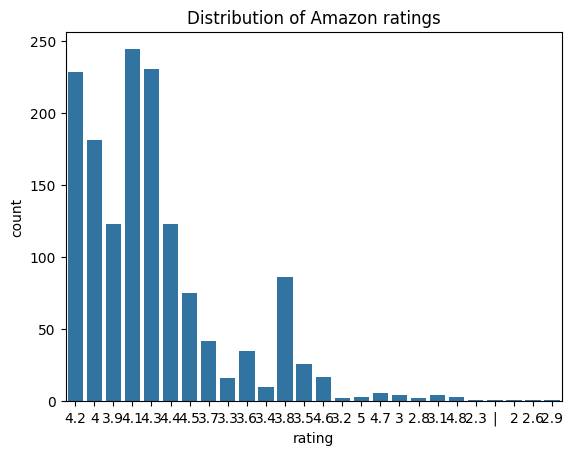

In [ ]:
sns.countplot(x='rating', data=df)
plt.title('Distribution of Amazon ratings')
plt.show()

#

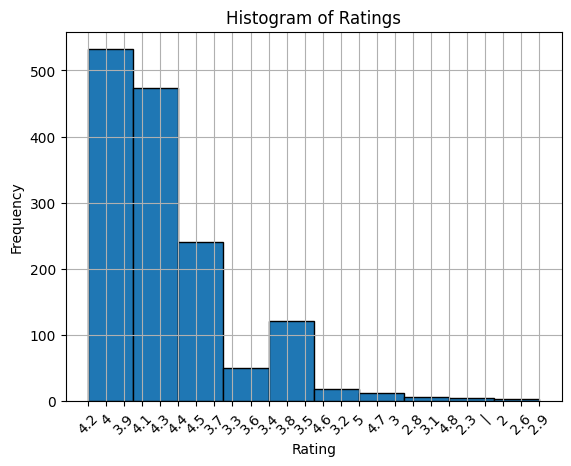

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram with rotated x-axis labels
df['rating'].hist(bins=10, edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees (or adjust as needed)
plt.show()


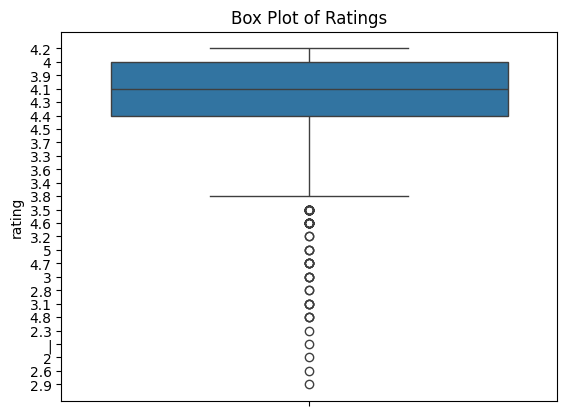

In [ ]:
import seaborn as sns

# Plot a boxplot for the 'rating' column
sns.boxplot(df['rating'])
plt.title('Box Plot of Ratings')
plt.show()


In [ ]:
# Convert the 'rating' and 'rating_count' columns to integers
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0).astype(int)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0).astype(int)

In [ ]:
# Summary statistics for 'rating'
rating_mean = df['rating'].mean()
rating_median = df['rating'].median()
rating_mode = df['rating'].mode()[0]  # Mode returns a Series, so we take the first value

# Summary statistics for 'rating_count'
rating_count_mean = df['rating_count'].mean()
rating_count_median = df['rating_count'].median()
rating_count_mode = df['rating_count'].mode()[0]  # Mode returns a Series

# Print results
print(f"Rating - Mean: {rating_mean}, Median: {rating_median}, Mode: {rating_mode}")
print(f"Rating Count - Mean: {rating_count_mean}, Median: {rating_count_median}, Mode: {rating_count_mode}")


Rating - Mean: 3.75358361774744, Median: 4.0, Mode: 4
Rating Count - Mean: 77.48737201365188, Median: 0.0, Mode: 0


In [ ]:
# Calculate range for 'rating' or 'rating_count'
rating_range = df['rating'].max() - df['rating'].min()
rating_count_range = df['rating_count'].max() - df['rating_count'].min()

print(f"Range for rating: {rating_range}")
print(f"Range for rating_count: {rating_count_range}")


Range for rating: 5
Range for rating_count: 992


In [ ]:
# Calculate quantiles for 'rating'
quantiles_rating = df['rating'].quantile([0.25, 0.5, 0.75])

# Calculate quantiles for 'rating_count'
quantiles_rating_count = df['rating_count'].quantile([0.25, 0.5, 0.75])

print("Quantiles for rating:")
print(quantiles_rating)

print("Quantiles for rating_count:")
print(quantiles_rating_count)


Quantiles for rating:
0.25    4.0
0.50    4.0
0.75    4.0
Name: rating, dtype: float64
Quantiles for rating_count:
0.25    0.0
0.50    0.0
0.75    0.0
Name: rating_count, dtype: float64


In [ ]:
# Calculate variance for 'rating'
rating_variance = df['rating'].var()

# Calculate variance for 'rating_count'
rating_count_variance = df['rating_count'].var()

print(f"Variance for rating: {rating_variance}")
print(f"Variance for rating_count: {rating_count_variance}")


Variance for rating: 0.2063139931740599
Variance for rating_count: 36942.00274343006


In [ ]:
# Calculate standard deviation for 'rating'
rating_std = df['rating'].std()

# Calculate standard deviation for 'rating_count'
rating_count_std = df['rating_count'].std()

print(f"Standard Deviation for rating: {rating_std}")
print(f"Standard Deviation for rating_count: {rating_count_std}")


Standard Deviation for rating: 0.4542180018163744
Standard Deviation for rating_count: 192.2030248030193


In [ ]:
# Calculate coefficient of variation for 'rating'
cv_rating = (rating_std / df['rating'].mean()) * 100

# Calculate coefficient of variation for 'rating_count'
cv_rating_count = (rating_count_std / df['rating_count'].mean()) * 100

print(f"Coefficient of Variation for rating: {cv_rating}%")
print(f"Coefficient of Variation for rating_count: {cv_rating_count}%")


Coefficient of Variation for rating: 12.100916033114903%
Coefficient of Variation for rating_count: 248.04431974948974%


### **Bivariate**

Correlation between rating and rating_count: -0.14092813882863575


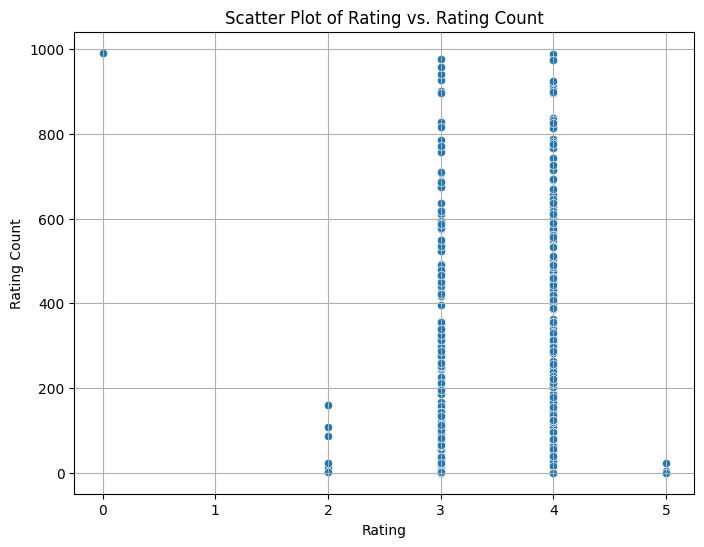

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded and 'rating' & 'rating_count' are numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# 1. Calculate Correlation
correlation = df['rating'].corr(df['rating_count'])
print(f"Correlation between rating and rating_count: {correlation}")

# 2. Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='rating', y='rating_count', data=df)

plt.title('Scatter Plot of Rating vs. Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.grid(True)
plt.show()

# **Data** **Cleaning**

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("amazon.csv")

In [76]:
# Try loading the CSV with UTF-8 encoding
try:
    data = pd.read_csv("amazon.csv", encoding="utf-8")
except UnicodeDecodeError:
    # If UTF-8 fails, try ISO-8859-1 (latin1)
    data = pd.read_csv("amazon.csv", encoding="ISO-8859-1")

# Check the first few rows
print(data[['discounted_price', 'actual_price']].head())

  discounted_price actual_price
0             ₹399       ₹1,099
1             ₹199         ₹349
2             ₹199       ₹1,899
3             ₹329         ₹699
4             ₹154         ₹399


In [77]:
# Convert percentage strings to decimal values (e.g., '64%' becomes 0.64)
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float) / 100

# Check the first few rows to confirm
print(data['discount_percentage'].head())



0    0.64
1    0.43
2    0.90
3    0.53
4    0.61
Name: discount_percentage, dtype: float64


In [83]:

def clean_numeric_column(column):
    # Remove any non-numeric characters (like '|') and convert to float
    return pd.to_numeric(column.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Apply the function to the columns with the issue
data['discounted_price'] = clean_numeric_column(data['discounted_price'])
data['actual_price'] = clean_numeric_column(data['actual_price'])
data['discount_percentage'] = clean_numeric_column(data['discount_percentage'])


In [84]:
print(data['actual_price'].head())


0    1099.0
1     349.0
2    1899.0
3     699.0
4     399.0
Name: actual_price, dtype: float64


In [85]:
#Simple sentiment feature (assuming higher word frequency relates to positive sentiment)
tfidf = TfidfVectorizer(max_features=50)
sentiment_features = tfidf.fit_transform(data['review_content'].fillna("")).toarray()
sentiment_score = np.mean(sentiment_features, axis=1)
data['sentiment_score'] = sentiment_score

# Check if any preprocessing is needed for numerical features
data[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']] = \
    data[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].fillna(0)


In [87]:
# Selecting features and target for rating prediction
features_rating = data[['discounted_price', 'actual_price', 'discount_percentage', 'sentiment_score']]
target_rating = data['rating'] #p

In [94]:
# Check that all feature columns are numeric
print(features_rating.dtypes)
print(target_rating.dtype)

# Handle NaN values (fill or drop based on your preference)
features_rating.fillna(0, inplace=True)  # or drop with features_rating.dropna(inplace=True)
target_rating.fillna(0, inplace=True)



discounted_price       float64
actual_price           float64
discount_percentage    float64
sentiment_score        float64
dtype: object
object


<ipython-input-94-bc8eb11298d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_rating.fillna(0, inplace=True)  # or drop with features_rating.dropna(inplace=True)


In [98]:
import re

def clean_column(column):
    # Remove non-numeric characters and convert to float
    return pd.to_numeric(column.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Apply cleaning function to each feature column and target column
for column in features_rating.columns.tolist():
    features_rating[column] = clean_column(features_rating[column])

# Apply to target column
target_rating = clean_column(target_rating)

<ipython-input-98-13a2ba4ec471>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_rating[column] = clean_column(features_rating[column])
<ipython-input-98-13a2ba4ec471>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_rating[column] = clean_column(features_rating[column])
<ipython-input-98-13a2ba4ec471>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [99]:
# Remove any commas in 'rating_count' and convert to float
data['rating_count'] = data['rating_count'].astype(str).str.replace(',', '').astype(float)

# Convert 'rating' to float in case there are any unexpected non-numeric values
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Check for any remaining NaN values and fill them with 0
data['rating'].fillna(0, inplace=True)
data['rating_count'].fillna(0, inplace=True)


<ipython-input-99-f2ba0a042913>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna(0, inplace=True)
<ipython-input-99-f2ba0a042913>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [102]:
# Replace non-numeric values with NaN in the numeric columns
for column in ['discounted_price', 'actual_price', 'discount_percentage']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Check and confirm the column types
print(data.dtypes)




product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
sentiment_score        float64
dtype: object


In [106]:
# Remove any currency symbols or commas from `discounted_price` and `actual_price` columns
data['discounted_price'] = data['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
data['actual_price'] = data['actual_price'].replace('[₹,]', '', regex=True).astype(float)

# Confirm the changes
print(data[['discounted_price', 'actual_price']].head())


   discounted_price  actual_price
0             399.0        1099.0
1             199.0         349.0
2             199.0        1899.0
3             329.0         699.0
4             154.0         399.0


# **Data modeling**

In [93]:
from textblob import TextBlob
data['sentiment_score'] = data['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else 0)


In [107]:

features = data[['discounted_price', 'actual_price', 'discount_percentage', 'sentiment_score', 'rating']]
target_popularity = data['rating_count']
target_rating = data['rating']

In [108]:
# Split data into training and testing sets for popularity prediction
X_train_popularity, X_test_popularity, y_train_popularity, y_test_popularity = train_test_split(
    features, target_popularity, test_size=0.2, random_state=42
)

In [109]:
# Split data into training and testing sets for rating prediction
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(
    features, target_rating, test_size=0.2, random_state=42
)

In [110]:
# Random Forest Regressor for Popularity Prediction
rf_popularity = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_popularity.fit(X_train_popularity, y_train_popularity)
popularity_predictions = rf_popularity.predict(X_test_popularity)

In [111]:
popularity_mse = mean_squared_error(y_test_popularity, popularity_predictions)
popularity_r2 = r2_score(y_test_popularity, popularity_predictions)
print(f"Popularity Prediction - Mean Squared Error: {popularity_mse}")
print(f"Popularity Prediction - R-squared: {popularity_r2}")

Popularity Prediction - Mean Squared Error: 1136531793.0150812
Popularity Prediction - R-squared: 0.41285809468293666


In [112]:
# Feature Importance for Popularity Prediction
popularity_feature_importance = rf_popularity.feature_importances_
print("Feature Importances for Popularity Prediction:")
for feature, importance in zip(features.columns, popularity_feature_importance):
    print(f"{feature}: {importance}")

Feature Importances for Popularity Prediction:
discounted_price: 0.17912644146427142
actual_price: 0.13510810381349514
discount_percentage: 0.14816340428621716
sentiment_score: 0.40566333575064323
rating: 0.13193871468537302


In [113]:
# Random Forest Regressor for Rating Prediction
rf_rating = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_rating.fit(X_train_rating, y_train_rating)
rating_predictions = rf_rating.predict(X_test_rating)

In [114]:
# Calculate Metrics for Rating
rating_mse = mean_squared_error(y_test_rating, rating_predictions)
rating_r2 = r2_score(y_test_rating, rating_predictions)
print(f"\nRating Prediction - Mean Squared Error: {rating_mse}")
print(f"Rating Prediction - R-squared: {rating_r2}")


Rating Prediction - Mean Squared Error: 9.547440273037512e-05
Rating Prediction - R-squared: 0.9988307719740717


In [115]:
# Feature Importance for Rating Prediction
rating_feature_importance = rf_rating.feature_importances_
print("Feature Importances for Rating Prediction:")
for feature, importance in zip(features.columns, rating_feature_importance):
    print(f"{feature}: {importance}")

Feature Importances for Rating Prediction:
discounted_price: 0.004806966899982816
actual_price: 0.0019321919957965455
discount_percentage: 0.004060173967118933
sentiment_score: 0.0020542941010976462
rating: 0.987146373036004


## **#Graphs**

In [116]:
# Set a seaborn style
sns.set(style="whitegrid")


<ipython-input-117-3544cc9c6b95>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_feature_importance, y=features.columns, palette="viridis")


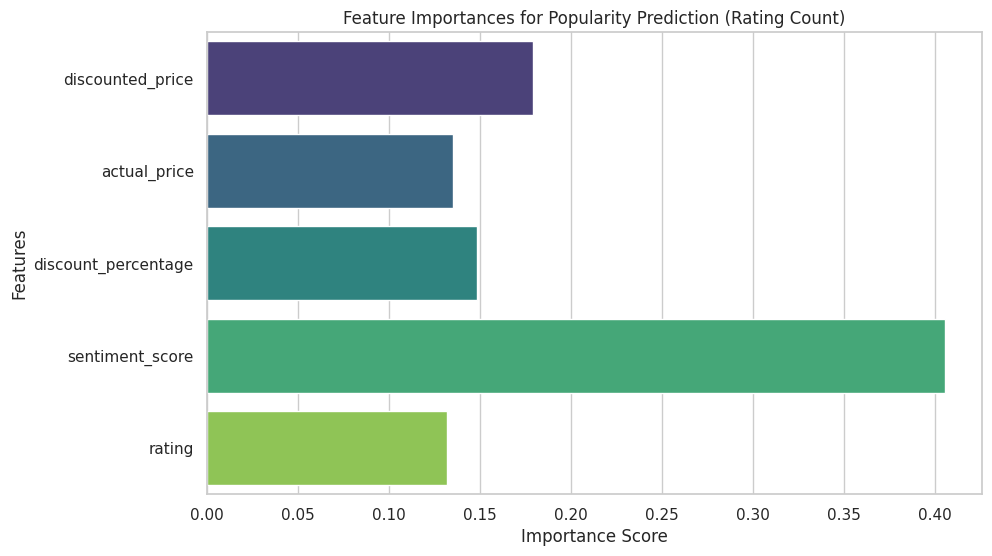

In [117]:
# 1. Feature Importance for Popularity Prediction
popularity_feature_importance = rf_popularity.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_feature_importance, y=features.columns, palette="viridis")
plt.title("Feature Importances for Popularity Prediction (Rating Count)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

<ipython-input-118-a47e27f7c6a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_feature_importance, y=features.columns, palette="magma")


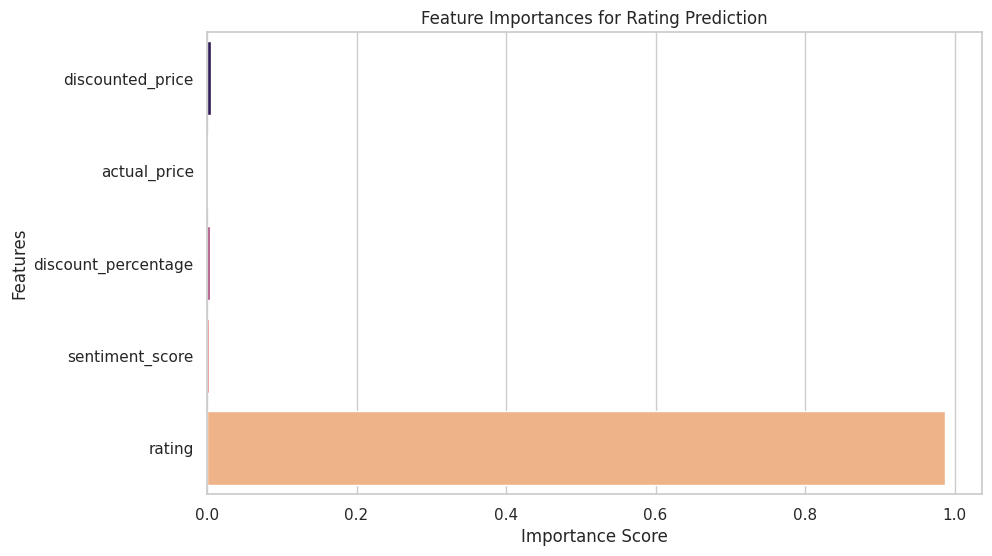

In [118]:
# 2. Feature Importance for Rating Prediction
rating_feature_importance = rf_rating.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_feature_importance, y=features.columns, palette="magma")
plt.title("Feature Importances for Rating Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

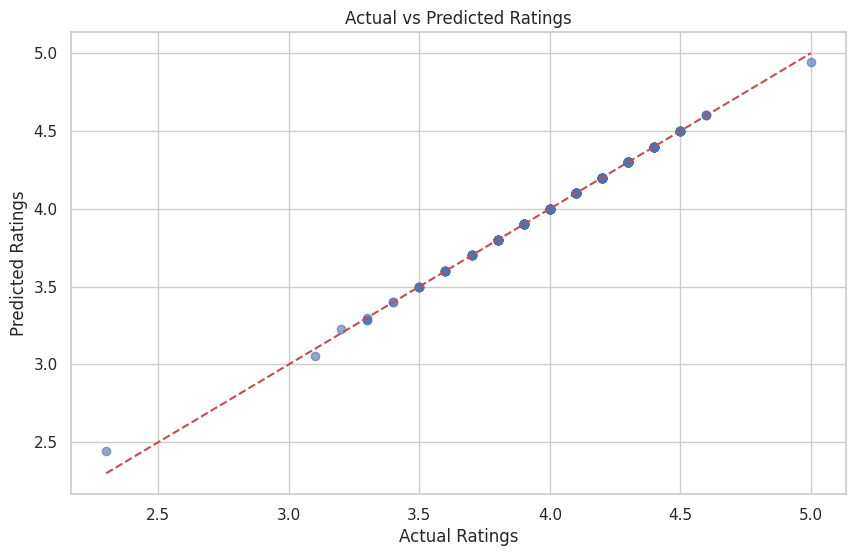

In [119]:
# 3. Actual vs Predicted Ratings (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rating, rating_predictions, alpha=0.6, color="b")
plt.plot([min(y_test_rating), max(y_test_rating)], [min(y_test_rating), max(y_test_rating)], 'r--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

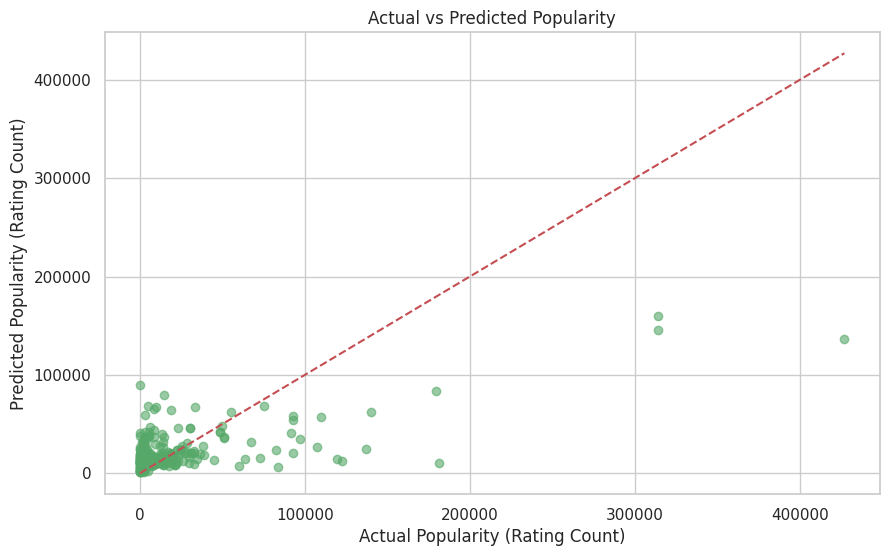

In [120]:
# 4. Actual vs Predicted Popularity (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_popularity, popularity_predictions, alpha=0.6, color="g")
plt.plot([min(y_test_popularity), max(y_test_popularity)], [min(y_test_popularity), max(y_test_popularity)], 'r--')
plt.xlabel("Actual Popularity (Rating Count)")
plt.ylabel("Predicted Popularity (Rating Count)")
plt.title("Actual vs Predicted Popularity")
plt.show()

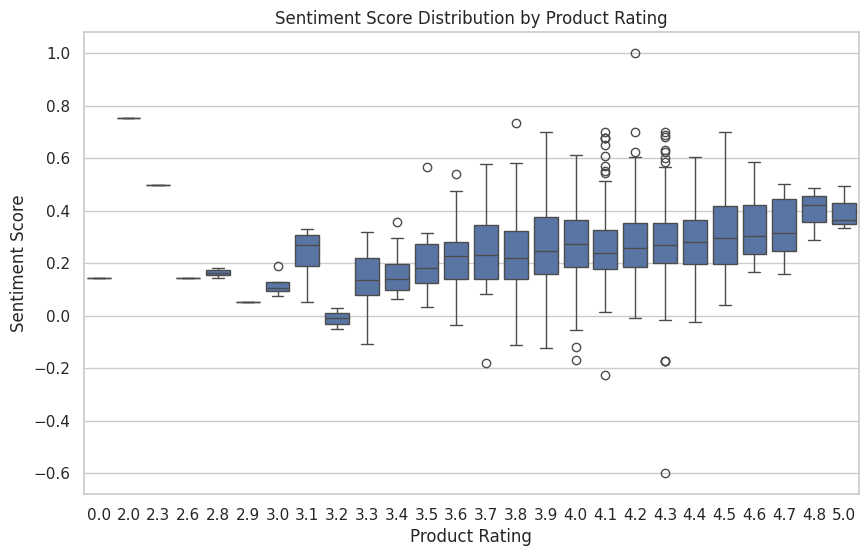

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['rating'], y=data['sentiment_score'])
plt.xlabel("Product Rating")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Distribution by Product Rating")
plt.show()

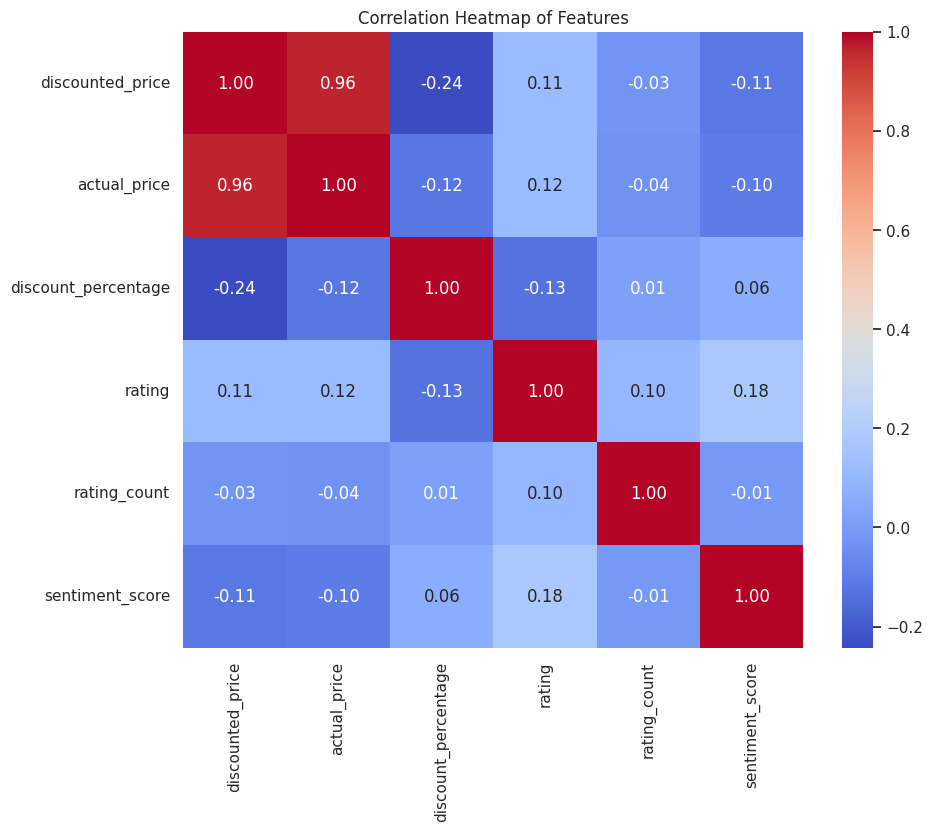

In [125]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'sentiment_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()